# EDSA Apple Price Challenge
#### Team TS5 Regression

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/Goldenapples.jpg"
     alt="Titanic"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

#  Table of Contents


1. <a href ="#1.-Challenge-description">Challenge description</a>
2. <a href ="#2.-Introduction">Introduction</a>
3. <a href ="#3.-Outline">Outline</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.-Importing-data">Importing data</a>
6. <a href ="#6.-Data-Cleaning">Data Cleaning</a>
7. <a href ="#7.-Exploratory-Data-Analysis">Exploratory Data Analysis</a>
8. <a href ="#8.-Machine-Learning">Machine Learning</a>

   Dummy variables
   
   Feature selection
   
   8.1. Linear model
   
      Importing some modules.

   8.2. Regularisation
   
   8.2.1. Ridge Regression

   Data Scaling

   Assessing the predictive accuracy of the Ridge model

   8.2.2. Lasso Regression
   
   Data Scaling
   
   Assessment of predictive accuracy
   
   8.3. Decision Trees
   
   Building the Decision Tree
   
   Decision Tree model tuning
   
   8.4. Random Forest
   
   Model Tuning for Random Forest

9. <a href ="#9.-Models-Evaluation">Models Evaluation</a>

   Models performace
   
   Feature Importance

10. <a href ="#10.-Best-Model-Validation-(Random-Forest)">Best Model Validation (Random Forest)</a>
11. <a href ="#11.-Model-Performance-Revised">Model Performance Revised</a>
   
   Log Transformation
   
   Comparing models when outliers are removed
12. <a href ="#12.-Predicting-on-the-Test-Data">Predicting on the Test Data</a>
   
  Test Data Preprocessing
  
  Predictions and submission file
  Conclusions

# 1. Challenge description

_____

Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

  Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.
  
  With this context, we are challenged to construct a regression algorithm, by EDSA, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.


# 2. Introduction


______

This notebook was made for the purpose of predicting Golden Delicious Apples product prices in the South Africa. The problem of fruits and veg pricing sooner or later affects most business owners who are participating in this industry. Many business owners in this industry wonder if they are overpricing or selling too cheaply in given market conditions.

This notebook consists of machine learning analysis of property price predictors and modelling price predictions itself for Golden Delicious Apples, hopefully may be useful for fruits and veg market participants.

Dataset used for the analysis is a record of packaged apple products sold across a number of provinces in South Africa from the date 2019-12-11 till 2020-10-03. The dataset consists of 13 self-described columns and 64375 rows.


# 3. Outline

_____

In this report, the aim is to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

To achieve this, we will perform a preprocessing of the data, statistical and exploratory data analysis, construct multiple machine learning models, train the data and run predictions on the average price per kg of Golden Delicious Apples. We will also investigate the importance of data features to help understand which features are more influential to the price of GD Apples.

Python libraries used:

* Numpy
* Pandas
* Sci-kit learn
* Matplotlib

Almost entire workflow is covered by these four libraries

# 4. Importing Libraries

_______

We will be importing a few python libraries.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np

We will be loading our data as a Pandas Dataframe. For this challenge we will be using `EDSA Apple Price Challenge` dataset.

# 5. Importing data

______

[<a href ="#Table-of-Contents">Back to table of contents</a>]

In [4]:
train = pd.read_csv(r'https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/df-train_set.csv')

In [ ]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


We look at the top rows of our data in order to see the features as well as the types of data we are working with.



# 6. Data Cleaning

_______

If we want to build some relationship between variables that are likely to indicate the average price per kg of Golden Delicious Apples, we really only want to consider the sales which involved Golden Delicious Apples to build this relationship:

In [5]:
train_data = train.copy()
train_data = train_data[train_data['Commodities']=='APPLE GOLDEN DELICIOUS']
train_data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [ ]:
train_data.shape

(1952, 13)

The shape command shows us we have 1952 rows and 13 columns.

Let's check if we have any unique values in our columns.

In [ ]:
train_data.nunique()

Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Commodities            1
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

We do not need columns with cardinality of 1. We can remove the column with an iterator.

In [ ]:
train_data = train_data.drop('Commodities', axis=1) 

# 7. Exploratory Data Analysis

_______

Let's explore the data types and the summary statistics of our variables.

We'll start by looking at the data types and number of entries of each column.

[<a href ="#Table-of-Contents">Back to table of contents</a>]

### Univariate analysis

In [6]:
# Checking basis information about column types and null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


The info command confirms our categorial and numerial features. We have 1952 samples in our dataset. Data is organized in 12 columns. From this, we can see that there are no null values in our data.

Now let's look at a table showcasing the summary statistics of the numeric data.

In [ ]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Let's check for outliers in our numeric data. We'll do this using the kurtosis method. A value > 3 indicates a high presence of outliers in our data, whereas a value < 3 indicates a lack thereof.

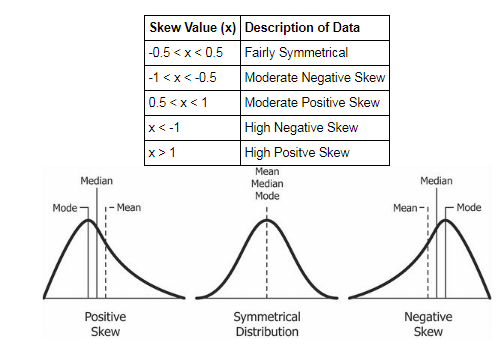

In [7]:
train_data.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

All of the numeric predictors are highly positively skewed. For most fetures, this is expected due to the nature of features investigated. For example, it is more concievable for costumers to buy more small units more often than large ones. Hence the mode is appears less than the mean on the Total_Kg_Sold, Weight_Kg, Total_Qty_Sold, etc. While this is true, it is also important to note that almost all the features are behaving the same when it comes to their skewness nature, mostly fot the same reason, but also for the correlation they have.

We will not be removing outliers yet. Removing outliers will definitely improve linear models, however we might loose valuable data when working with more complex models. We will investigate this later in the notebook.

Let's visualize the boxplot of the `Stock_on_Hand` feature.

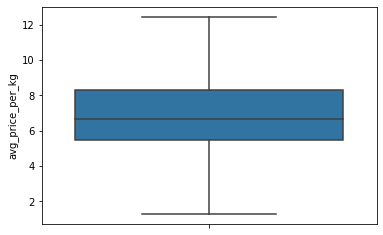

In [10]:
_ = sns.boxplot(data=train_data, y='avg_price_per_kg', showfliers=False)

Now, let's look at the distribution of the `avg_price_per_kg`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


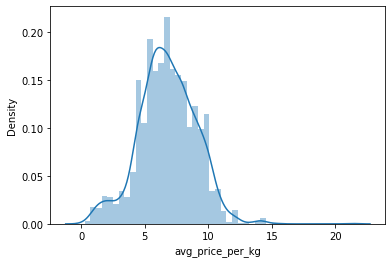

In [ ]:
_ = sns.distplot(train_data['avg_price_per_kg'], kde=True)

Below is the histograms showing the fequency of all the numeric features.

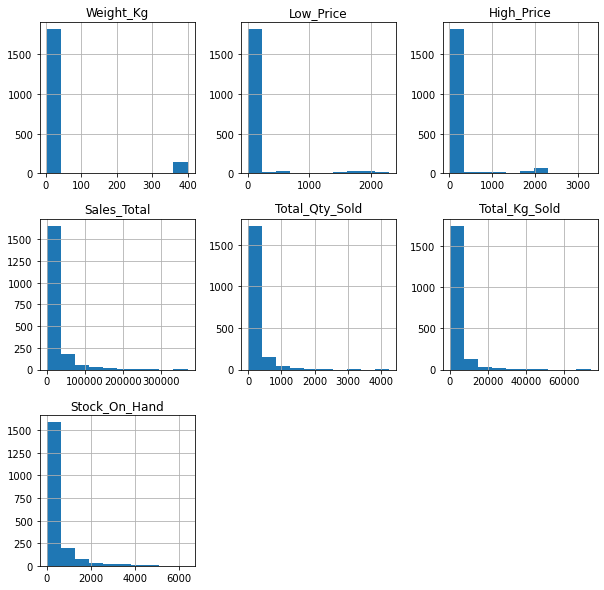

In [11]:
# create a list of all numerical features
cols = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']

train_data[cols].hist(figsize=(10,10));

### Categorical data

Now, let's take a look at the categorical data.

In [ ]:
train_data.describe(include='object')

,Province,Container,Size_Grade,Date
count,1952,1952,1952,1952
unique,7,11,10,147
top,CAPE,M4183,1S,2020-07-20
freq,1045,588,532,35


Cape is the province where most properties were sold. We have 11 different container categories, however almost a third of the containers belong to 'M4183' category. By far the most common size grade was 1S.

Bar graph shows province frequency. This helps understand how is the data distributed amongst the provinces. As shown below, for instance, most of the data is from Cape, and the least is Free State.

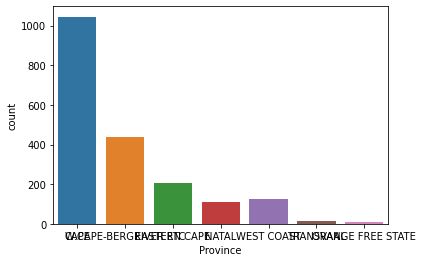

In [12]:
_ = sns.countplot(data=train_data, x='Province')

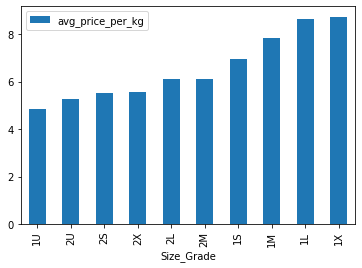

In [ ]:
# plot avg_price_per_kg against the Size_Grade
_ = train_data.groupby('Size_Grade').agg({'avg_price_per_kg':'median'}).sort_values(by='avg_price_per_kg').plot(kind='bar')

From this graph we see that 1X size grade apples are the most expensive, while 1U is the cheapest.

### Multivariate analysis

Now, let's check how the variables are correlated with one another.

In [13]:
train_data.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


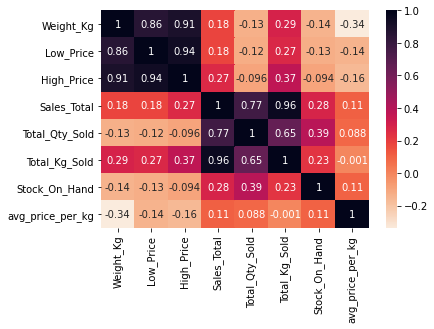

In [14]:
# Checking correlation
corr_mat = train_data.corr()
_ = sns.heatmap(corr_mat, annot=True, cmap=sns.cm.rocket_r)

There seems to be a high correlation between predictor variables ` Weight_Kg`, `Low_Price` and `High_Price`. This is as expected since the price will be related to the weight of the apples.

There is also a strong correlation between predictor variables `Sales_Total`, `Total_Qty_Sold` and `Total_Kg_Sold`. Again, we expect this because the more kg apples you sell the larger your profits will be.

### Pair Plot

We use a pair plot to visualise the relationships between all the numerical features.

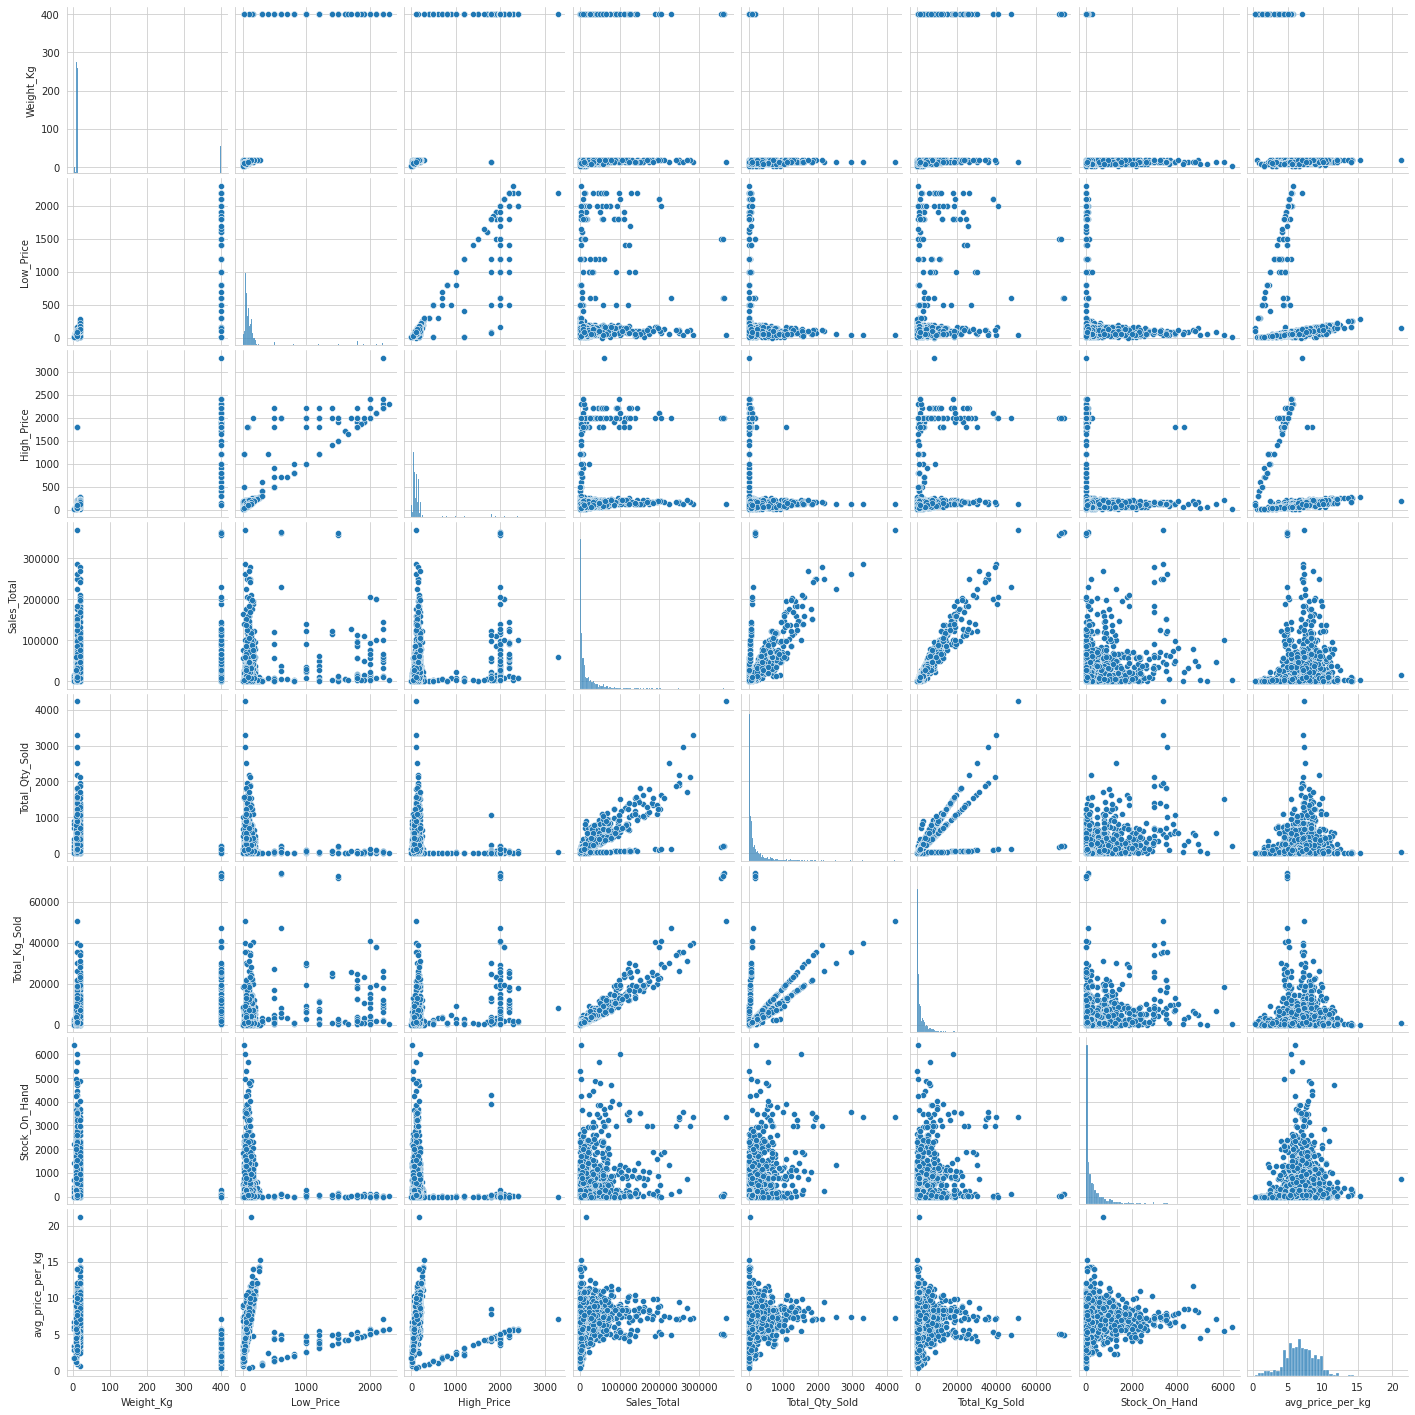

In [15]:
sns.set_style("whitegrid");
sns.pairplot(train_data);
plt.show();

# 8. Machine Learning

_____

[<a href ="#Table-of-Contents">Back to table of contents</a>]

## Dummy variables

All input data for regression model building purposes needs to be numerical. We therefore have to transform the text data (found within columns such as 'Province','Container', 'Size_Grade', 'Commodities' and 'Date') into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and ***get_dummies*** will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [ ]:
# Saving predictors and target in separate objects
x = train_data.copy()
y = x.pop('avg_price_per_kg')

In [ ]:
x.shape

(1952, 11)

In [ ]:
dummy_df = pd.get_dummies(x, drop_first = True)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
dummy_df.shape

(1952, 178)

In [ ]:
# check if there are any features with only 1 unique value
dummy_nonuq = dummy_df.loc[:,dummy_df.nunique() == 1]
dummy_nonuq.columns

Index([], dtype='object')

We have now 178 columns due to dummy variable encoding. 

## Feature selection

Feature selection is a technique where we choose those features in our data that contribute most to the target variable. The classes in the sklearn.feature_selection module can be used for feature selection.

Due to dummy variable encoding we have 178 features, however we would like to reduce this number. This will hopefully reduce the chances of our model overfitting on our training data (less redundant data leads to model making decisions based on noise), and not fitting well will test data.

We'll use the selection method SelectKBest.

SelectKBest uses a scoring function either f_regression or mutual_info_regression (for regression problems) along with a k paramater where this paramater will select the top $k^{th}$ features based on their scores which were generated from the scoring function.

F_regression captures linear dependencies, however mutual information can capture any kind of dependencies between variables. Hence, we will use mutual information regression.

In [ ]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

We will select k = 40. For us, k could be any number between 1 and 178. We can create a list of k's, and see how the model will perform on the k number of features. But for now, we'll only choose k = 40, and see how the model will perform on all the features compared to the top 40 features.

In [ ]:
# Creating selector
select = SelectKBest(score_func = mutual_info_regression, k=40)

In [ ]:
# Fitting selector
X_reg_new = select.fit_transform(dummy_df, y)

In [ ]:
X_reg_new.shape

(1952, 40)

In [ ]:
# 111 top feature names
filter = select.get_support()

In [ ]:
# create list of top 111 features
kbest_features = list(dummy_df.columns[filter])
kbest_features

['Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'Province_EASTERN CAPE',
 'Province_NATAL',
 'Province_TRANSVAAL',
 'Province_W.CAPE-BERGRIVER ETC',
 'Province_WEST COAST',
 'Container_DT063',
 'Container_EC120',
 'Container_EF120',
 'Container_IA400',
 'Container_JE090',
 'Container_JG110',
 'Container_M4183',
 'Size_Grade_1M',
 'Size_Grade_1S',
 'Size_Grade_1X',
 'Size_Grade_2L',
 'Size_Grade_2M',
 'Size_Grade_2S',
 'Size_Grade_2U',
 'Date_2020-01-30',
 'Date_2020-02-14',
 'Date_2020-02-21',
 'Date_2020-04-14',
 'Date_2020-04-17',
 'Date_2020-05-06',
 'Date_2020-06-09',
 'Date_2020-06-25',
 'Date_2020-07-13',
 'Date_2020-07-29',
 'Date_2020-08-06',
 'Date_2020-08-31',
 'Date_2020-09-02',
 'Date_2020-09-23']

In [ ]:
kbest_df = pd.DataFrame(data=X_reg_new, columns=kbest_features)
kbest_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_TRANSVAAL,...,Date_2020-04-17,Date_2020-05-06,Date_2020-06-09,Date_2020-06-25,Date_2020-07-13,Date_2020-07-29,Date_2020-08-06,Date_2020-08-31,Date_2020-09-02,Date_2020-09-23
0,18.3,150.0,170.0,51710.0,332.0,6075.6,822.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,50.0,50.0,16000.0,320.0,3520.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,55.0,55.0,990.0,18.0,162.0,1506.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.3,80.0,120.0,32020.0,388.0,7100.4,443.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,400.0,1800.0,1800.0,1800.0,1.0,400.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the following section, let's try building our model using Linear Regression.

## **8.1. Linear model**

[<a href ="#Table-of-Contents">Back to table of contents</a>]

#### Importing some modules.

In [ ]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

We'll create two different predictor variable training sets. One set will contain all predictors, and the other will house the kbest features.

In [ ]:
X_lin_best = kbest_df
X_lin_all = dummy_df # wanna check if more columns has influences on predictive power
y_lin = y

In [ ]:
# Split the data into train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_lin_all, y_lin, test_size = 0.2,random_state=42)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_lin_best, y_lin, test_size = 0.2,random_state=42)

In [ ]:
# define model
lm_all = LinearRegression(n_jobs=-1)
lm_best = LinearRegression(n_jobs=-1)

In [ ]:
# Train the model
lm_all.fit(X_train_all, y_train_all)
lm_best.fit(X_train_best, y_train_best)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
# Make predictions
train_pred_all = lm_all.predict(X_train_all)
test_pred_all = lm_all.predict(X_test_all)

train_pred_best = lm_best.predict(X_train_best)
test_pred_best = lm_best.predict(X_test_best)

In [ ]:
train_rmse_all = np.sqrt(mean_squared_error(y_train_all, train_pred_all))
test_rmse_all = np.sqrt(mean_squared_error(y_test_all, test_pred_all))
    
train_rmse_best = np.sqrt(mean_squared_error(y_train_best, train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test_best, test_pred_best))

In [ ]:
df = {'Train RMSE all features': train_rmse_all,'Test RMSE all features':test_rmse_all,'Train RMSE kbest features': train_rmse_best,'Test RMSE kbest features':test_rmse_best}
df

{'Train RMSE all features': 1.2139989096502701,
 'Test RMSE all features': 1.4105711751620118,
 'Train RMSE kbest features': 1.3945613996345398,
 'Test RMSE kbest features': 1.4487617228567198}

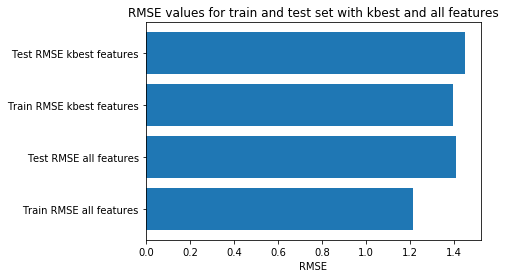

In [ ]:
fig, ax = plt.subplots()
RMSE = [train_rmse_all, test_rmse_all, train_rmse_best, test_rmse_best]
set_features = ['Train RMSE all features', 'Test RMSE all features', 'Train RMSE kbest features','Test RMSE kbest features']

ax.barh(set_features, RMSE)
ax.set_yticks(set_features)
ax.set_yticklabels(set_features)
ax.set_xlabel('RMSE')
ax.set_title('RMSE values for train and test set with kbest and all features')

plt.show()

**Metrics used**
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 
  

The RMSE on the train set for all features is lower than that of the kbest features, however the RMSE on the test set is similar for both choices of features. This indicates that the model is slightly overfitting when training on all features. Henceforth, we'll be using the kbest features to train our models in order to minimise overfitting.

In the next section, we will try to improve our linear model by introducing regularisation techniques.

## **8.2. Regularisation**

[<a href ="#Table-of-Contents">Back to table of contents</a>]

Regularisation is a method used to improve the predictive accuracy of a model while putting constraints on the predictor variables.

Recall that the least squares method seeks to minimise the sum of the squares of the residuals:

$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$   

which can be written in terms of the predictor variable coefficients, [$b_1, b_2, b_p$], and slope, $a$:   

$$RSS = \sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2$$

where _n_ is the number of observations, and _p_ is the number of predictor variables. In the case of **ridge regression**, the regression coefficients are calculated as the values that minimise:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^pb_j^2$$

which is rewritten simply as:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

In minimising _RSS_ , we improve the overall fit of the model. In the newly introduced term, $\alpha\sum_{j=1}^pb_j^2$, the intention is to penalise those individual coefficients that get too large (those that contribute the most to reducing the fit).

In the new term, $\alpha$ is a tuning parameter which controls the degree to which the regression coefficients are penalised. The effect of this penalty parameter is to create a tradeoff between how much a coefficient contributes to minimising RSS and the size of the coefficient. In other words: _training fit_ vs. _size of coefficients_. 

In the newly introduced term, we can see that the penalty parameter is applied to the sum of the squares of the coefficients. This means that as we increase the size of the coefficients, the penalty will increase too. And so, this has the effect of _shrinking_ the coefficients towards zero.


Now let's apply ridge regression to our data.

## **8.2.1. Ridge Regression**

Before we apply ridge regression, we will need to scale our data.

Scaling data is a critical to regularisation as the penalty on particular coefficients in regularisation techniques depends largely on the scale associated with the variables. Regularisation puts constraints on the size of the coefficients related to each variable. Therefore, rescaling is very important for methods with regularisation because the size of the variables affects how much regularisation will be applied to that specific variable. So to make it fair, we need to get all the features on the same scale. 

#### Data Scaling

In [ ]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split data into predictors and response
X_ridge = X_lin_best
y_ridge = y_lin

In [ ]:
# Create scaler object
scaler = StandardScaler()

In [ ]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X_ridge)

In [ ]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X_ridge.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_TRANSVAAL,...,Date_2020-04-17,Date_2020-05-06,Date_2020-06-09,Date_2020-06-25,Date_2020-07-13,Date_2020-07-29,Date_2020-08-06,Date_2020-08-31,Date_2020-09-02,Date_2020-09-23
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,-0.343488,-0.245547,-0.088,...,-0.084994,-0.078648,-0.084994,-0.084994,-0.084994,-0.104284,-0.088,-0.078648,-0.075281,-0.099143
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,-0.343488,-0.245547,-0.088,...,-0.084994,-0.078648,-0.084994,-0.084994,-0.084994,-0.104284,-0.088,-0.078648,-0.075281,-0.099143
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-0.343488,-0.245547,-0.088,...,-0.084994,-0.078648,-0.084994,-0.084994,-0.084994,-0.104284,-0.088,-0.078648,-0.075281,-0.099143
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,-0.343488,-0.245547,-0.088,...,-0.084994,-0.078648,-0.084994,-0.084994,-0.084994,-0.104284,-0.088,-0.078648,-0.075281,-0.099143
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,2.911310,-0.245547,-0.088,...,-0.084994,-0.078648,-0.084994,-0.084994,-0.084994,-0.104284,-0.088,-0.078648,-0.075281,-0.099143


Now that we've scaled our data, we can split it into a train and test set.

In [ ]:
#Split the data into train and test, being sure to use the standardised predictors
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_standardise, 
                                                    y_ridge, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [ ]:
# Create ridge model
ridge = Ridge()

In [ ]:
# Train the model
ridge.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Assessing the predictive accuracy of the Ridge model 
We can make use of the `sklearn.metrics` library to assess the accuracy of our model. For comparison, we'll fit a linear model (without regularisation) to the data.

In [ ]:
# Create linear model object
lm = LinearRegression(n_jobs=-1)

# Train linear model on scaled data
lm.fit(X_train_ridge, y_train_ridge)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
# Check training accuracy
train_lm = lm.predict(X_train_ridge)
train_ridge = ridge.predict(X_train_ridge)

print('Training RMSE')
print('Linear:', np.sqrt(mean_squared_error(y_train_ridge, train_lm)))
print('Ridge :', np.sqrt(mean_squared_error(y_train_ridge, train_ridge)))

Training RMSE
Linear: 1.3945613996345398
Ridge : 1.3971419452015215


In [ ]:
test_lm = lm.predict(X_test_ridge)
test_ridge = ridge.predict(X_test_ridge)

print('Testing RMSE')
print('Linear:', np.sqrt(mean_squared_error(y_test_ridge, test_lm)))
print('Ridge :', np.sqrt(mean_squared_error(y_test_ridge, test_ridge)))

Testing RMSE
Linear: 1.4487617228566498
Ridge : 1.4507776190392085


There is no significant improvement in the training MSE nor testing MSE when ridge regression is applied. 

Let us try **Lasso Regression** to improve our model.

## **8.2.2. Lasso Regression**

Recall the optimisation expression for ridge regression:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

where we attempt to minimise the RSS and some penalty term. This can be rewritten:

$$\min_{\beta} (RSS + \alpha(L2\_norm))$$

where $L2\_norm$ is the sum of the squares of the coefficients.

In LASSO regularisation, we replace the $L2\_norm$ with what is known as the $L1\_norm$: the sum of the _absolute_ values of the coefficients.

This is a relatively recent adaptation of ridge regression which is capable of shrinking predictors to exactly zero - effectively removing them from the model entirely and creating what we call a sparse model (one which uses some subset of all of the available predictors). In this way, LASSO achieves both shrinkage and subset selection.

A LASSO model is fit under the constraint of minimizing the following equation:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$

which can be rewritten as follows:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^p|b_j|)$$

or,

$$\min_{\beta} (RSS + \alpha(L1\_norm))$$

[<a href ="#Table-of-Contents">Back to table of contents</a>]

#### Data Scaling

Again, we will scale our data first.

In [ ]:
# Split data into predictors and response
X_feat = X_lin_best
y_tar = y_lin

In [ ]:
# Save standardized features into new variable
X_scaled2 = scaler.fit_transform(X_feat)

In [ ]:
# Split dataset into train and test sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled2, 
                                                    y_tar, 
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Create LASSO model object (define model), setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [ ]:
# Train the LASSO model
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X_feat.columns, columns=['Coefficient'])

Lets visualize the predictors that we shrunk to zero.

In [ ]:
no = coeff[coeff['Coefficient']==0]
no

,Coefficient
Weight_Kg,-0.0
Container_DT063,0.0
Size_Grade_1M,-0.0
Date_2020-01-30,-0.0
Date_2020-06-25,0.0
Date_2020-07-29,-0.0


In [ ]:
# create list of features that were shrunk to zero
index_list = no.index.tolist()
index_list

['Weight_Kg',
 'Container_DT063',
 'Size_Grade_1M',
 'Date_2020-01-30',
 'Date_2020-06-25',
 'Date_2020-07-29']

#### Assessment of predictive accuracy

Again, we'll make use of the `sklearn.metrics` library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

- A least squares model using all available predictors;
- A least squares model using the predictors with non-zero coefficients from LASSO;
- A ridge regression model using all available predictors.

First, we'll create a subset of our data set, removing all predictor variables with a coefficient of zero.

In [ ]:
X_subset = X_feat.drop(index_list,axis=1)
X_subset.shape

(1952, 34)

In [ ]:
# scale subset data
X_subset_scaled = scaler.fit_transform(X_subset)

# create train and test set of the subset data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled, 
                                                        y_tar, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

In [ ]:
# Train the models
lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train_lasso, y_train_lasso)
ridge.fit(X_train_lasso, y_train_lasso)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train_lasso)
train_ridge = ridge.predict(X_train_lasso)
train_lasso = lasso.predict(X_train_lasso)

train_lm_subset_rmse = np.sqrt(mean_squared_error(y_train2, train_lm_subset))
train_lm_all_rmse = np.sqrt(mean_squared_error(y_train_lasso, train_lm_all))
train_ridge_rmse = np.sqrt(mean_squared_error(y_train_lasso, train_ridge))
train_lasso_rmse = np.sqrt(mean_squared_error(y_train_lasso, train_lasso))

In [ ]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test_lasso)
test_ridge = ridge.predict(X_test_lasso)
test_lasso = lasso.predict(X_test_lasso)

test_lm_subset_rmse = np.sqrt(mean_squared_error(y_test2, test_lm_subset))
test_lm_all_rmse = np.sqrt(mean_squared_error(y_test_lasso, test_lm_all))
test_ridge_rmse = np.sqrt(mean_squared_error(y_test_lasso, test_ridge))
test_lasso_rmse = np.sqrt(mean_squared_error(y_test_lasso, test_lasso))

In [ ]:
# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "Least Squares, Subset": np.sqrt(mean_squared_error(y_train2, train_lm_subset)),
                        "Least Squares, All": np.sqrt(mean_squared_error(y_train_lasso, train_lm_all)),
                        "Ridge": np.sqrt(mean_squared_error(y_train_lasso, train_ridge)),
                        "LASSO": np.sqrt(mean_squared_error(y_train_lasso, train_lasso))
                    },
                    'Test RMSE':
                    {
                        "Least Squares, Subset": np.sqrt(mean_squared_error(y_test2, test_lm_subset)),
                        "Least Squares, All": np.sqrt(mean_squared_error(y_test_lasso, test_lm_all)),
                        "Ridge": np.sqrt(mean_squared_error(y_test_lasso, test_ridge)),
                        "LASSO": np.sqrt(mean_squared_error(y_test_lasso, test_lasso))
                    }
                }

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE
LASSO,1.402934,1.444711
"Least Squares, All",1.394561,1.448762
"Least Squares, Subset",1.394463,1.460102
Ridge,1.397142,1.450778


Training the linear model on the subset of data (predictor variables dropped with coefficient = 0) is not a good idea since the difference between the train and test RMSE is the highest, compared to all the other models.

From the above table we can see that the training RMSE actually increased using Lasso regression, however testing RMSE actually decreased, indicating higher predictive accuracy. It seems like the use of regularisation techniques doesn't improve the performance of our model significantly.

We will investigate more complex models in our quest to improve the predictive power of our model.

[<a href ="#Table-of-Contents">Back to table of contents</a>]

## **8.3. Decision Trees**

Decision Trees are tree-like (upside down) machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. 

In [ ]:
# set test size to 20 % of training data
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_feat, y_tar, test_size=0.2, random_state=42)

#### Building the Decision Tree

In [ ]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#### Decision Tree model tuning

Tuning the hyperparamaters of the Decision Tree model is important to obtain optimal performance. Let's create a dictionary that houses a lists of values where we will choose from to tune the hyperparamaters. We will be tuning `max_depth`, `min_samples_leaf` and `min_samples_split`.

In [ ]:
param_dist = {'max_depth':list(range(5,15,2)),'min_samples_leaf':list(range(1,5)), 'min_samples_split': list(range(5,30,5))}

In order to find the best combination of hyperparamaters, we will import `GridSearchCV`.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
regr_tree = DecisionTreeRegressor()
grid = GridSearchCV(regr_tree,param_grid=param_dist, cv=10, n_jobs=-1)

In [ ]:
# fit the grid to the train set in order to find best combination of hyperparamters
grid.fit(x_train_dt,y_train_dt)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_sp

In [ ]:
# show hyperparamters of DecisionTreeRegressor
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# show best r^2 value from combinations available
grid.best_score_

0.8863429798484235

In [ ]:
# show best combination of values for hyperparamaters that were investigated
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}

Now, lets apply these optimal hyperparamaters to our **DecisionTreeRegressor**.

In [ ]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=10,random_state=42)

In [ ]:
# fit and train model
regr_tree.fit(x_train_dt,y_train_dt)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [ ]:
# get predictions for train and test data
y_pred_train_dt = regr_tree.predict(x_train_dt)
y_pred_test_dt = regr_tree.predict(x_test_dt)

# calculate MSE
rmse_train_dt = np.sqrt(mean_squared_error(y_pred_train_dt, y_train_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_pred_test_dt,y_test_dt))

# Report RMSE
print("Regression Decision Tree model RMSE train is:",rmse_train_dt)
print("Regression Decision Tree model RMSE test is:",rmse_test_dt)

Regression Decision Tree model RMSE train is: 0.5266811073163471
Regression Decision Tree model RMSE test is: 0.7268997980448755


The RMSE for the train and test set improved significantly for the Decision Tree model, however we would like to improve the RMSE even further. Thus, let's enter the Random Forest... 

## **8.4. Random Forest**

A random forest is a powerful non-parametric algorithm and as mentioned is an example of an **ensemble** method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the output is mean prediction of the individual trees.

In [ ]:
# set test size to 20 % of training data
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(X_feat, y_tar, test_size=0.2, random_state=42)

In [ ]:
# import RandomForesRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor()

#### Model Tuning for Random Forest

In [ ]:
# dictionary containing list of values for getting optimal hyperparamaters
param_dist_rf = {'n_estimators': [100],'max_features': list(range(15,25,3)),'max_depth': list(range(8,18,3)),'min_samples_split':list(range(5,15,3))}

In [ ]:
# define grid
grid_rf = GridSearchCV(RF,param_grid=param_dist_rf, cv=10, n_jobs=-1)

In [ ]:
# fit and train grid
grid_rf.fit(x_train_random,y_train_random)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [ ]:
# return best r^2 value for optimal combination of hyperparamaters
grid_rf.best_score_

0.9181447081359126

In [ ]:
# get best combination of hyperparamaters that was tuned
grid_rf.best_params_

{'max_depth': 17,
 'max_features': 30,
 'min_samples_split': 5,
 'n_estimators': 120}

Now, lets apply these optimal hyperparamaters to our **RandomForestRegressor**.

In [ ]:
# Instantiate Random Forest model with optimal hyperparamters
RF = RandomForestRegressor(n_estimators=100, max_features = 21, max_depth=14, min_samples_split=5, min_samples_leaf=3, random_state=1)

In [ ]:
# fit and train model
RF.fit(x_train_random,y_train_random)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features=21, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [ ]:
# training set predictions
train_rf = RF.predict(x_train_random)
train_rf_rmse = np.sqrt(mean_squared_error(y_train_random, train_rf))

# Compute RMSE on train set
print('RMSE',np.sqrt(mean_squared_error(y_train_random, train_rf)))

RMSE 0.44710388841924054


In [ ]:
# Get predictions
test_rf = RF.predict(x_test_random)
test_rf_rmse = np.sqrt(mean_squared_error(y_test_random,test_rf))

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test_random,test_rf)))

RMSE: 0.5473432835817816


# **9. Models Evaluation**

_____

[<a href ="#Table-of-Contents">Back to table of contents</a>]

### Models performace

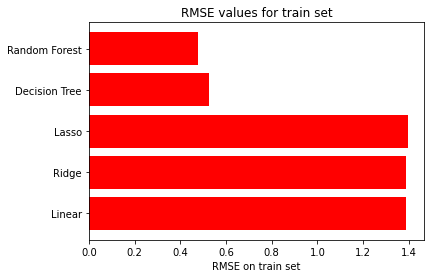

In [ ]:
fig, ax = plt.subplots()
train_rmse = [train_rmse_best, train_ridge_rmse, train_lasso_rmse, rmse_train_dt, train_rf_rmse]
models = ['Linear', 'Ridge', 'Lasso','Decision Tree', 'Random Forest']

ax.barh(models, train_rmse, color='red')
ax.set_yticks(models)
ax.set_yticklabels(models)
ax.set_xlabel('RMSE on train set')
ax.set_title('RMSE values for train set')

plt.show()

From the above graph we can see that the training RMSE improved significantly with the Decision Tree and Random Forest model.

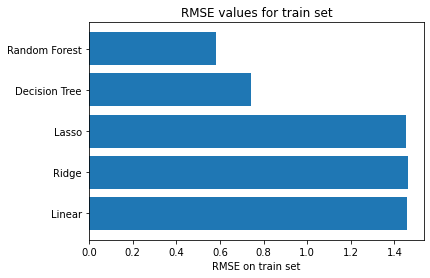

In [ ]:
fig, ax = plt.subplots()
train_rmse = [test_rmse_best, test_ridge_rmse, test_lasso_rmse, rmse_test_dt, test_rf_rmse]
models = ['Linear', 'Ridge', 'Lasso','Decision Tree', 'Random Forest']

ax.barh(models, train_rmse)
ax.set_yticks(models)
ax.set_yticklabels(models)
ax.set_xlabel('RMSE on train set')
ax.set_title('RMSE values for test set')

plt.show()

From the RMSE of the test set, confirms that the Random Forest model performed the best on data.

Our goal was to minimalize the root mean squared error. The random forest regressor model performed best. Let's take a closer look at it.

### Feature Importance

Feature importance describes which features are relevant. Feature importance can sometimes help with model improvements by implementing the feature selection. The Random Forest algorithm has a built in feature importance method.

The more accurate the model is, the more trustworthy the computed importances are. The computed importances describe how important features are for the machine learning model. It is an approximation of how important features are in the data.

In [ ]:
# apply feature importance
feat_imp = RF.feature_importances_
df = pd.DataFrame(feat_imp, index=[X_feat.columns], columns=['Feature Importance'])
df.sort_values('Feature Importance',ascending=False)

,Feature Importance
Low_Price,0.367770
High_Price,0.283549
Weight_Kg,0.126613
Container_IA400,0.082718
Sales_Total,0.030683
Container_M4183,0.025826
Province_NATAL,0.016889
Stock_On_Hand,0.014599
Total_Kg_Sold,0.013121
Total_Qty_Sold,0.012863


From the above table we see that some features were not important at all and thus redundant.

# 10. Best Model Validation (Random Forest)

______



In [ ]:
# Saving models predictions
y_pred = RF.predict(x_test_random)

In [ ]:
# Saving model's results and errors to the data frame
df_errors = pd.DataFrame(np.c_[y_pred, y_test_random], columns=['y_pred', 'y_test_random'])
df_errors['error'] = df_errors['y_pred'] - df_errors['y_test_random']

In [ ]:
import plotly.express as px

fig16 = px.histogram(df_errors, x='error', nbins=200)
fig16.update_layout(title='Distribution of model errors')
fig16.show()

ModuleNotFoundError: No module named 'plotly'

Distribution of errors is symmetrical around the mean (close to 0). No significant skewness was observed, so there is no room for improvement in the symmetry area.

In [ ]:
import plotly.graph_objects as go

min = df_errors[['y_test_random', 'y_pred']].min().min()
max = df_errors[['y_test_random', 'y_pred']].max().max()
fig17 = go.Figure(data=[go.Scatter(x=df_errors['y_test_random'], y=df_errors['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, xaxis_title='y_test_random', 
                                     yaxis_title='y_pred', title='Regression results'))
fig17.show()

The outcome of the model is correctly predicting the values of Y, therefore it happens that it makes very less significant errors. This is reflected in both mean squared error metric and errors histogram.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=RF, X=x_train_random, y=y_train_random, cv=5)

In [ ]:
print(f'Average model score is {scores.mean():.3f}. Standard deviation of validation sets scoring is {scores.std():.3f}')

Average model score is 0.903. Standard deviation of validation sets scoring is 0.045


Average model score is in line with our expectation. Fluctuation in scoring was noted, but within acceptable limits.

# **11. Model Performance Revised**

_____


### Log Transformation

Log transformations are known to help model performance, especially when the target variable is skewed to the right. When we checked the skewness of the numeric features we saw the target variable wasn't highly skewed. However, all the predictor variables were highly skewed to the right. So let's apply log transformation to these predictor variables.

In [ ]:
# Define features and target variable
new_x = train_data.copy()
new_y = new_x.pop('avg_price_per_kg')

In [ ]:
# Transforming skewed variables distribution
for column in ['Total_Qty_Sold', 'High_Price', 'Sales_Total', 'Stock_On_Hand', 'Weight_Kg', 'Total_Kg_Sold', 'Low_Price']:
  new_x[column] = np.log1p(new_x[column])

In [ ]:
# check skewness of numeric features after log transformation
new_x.skew()

Weight_Kg         2.720130
Low_Price         1.224452
High_Price        1.158174
Sales_Total      -0.469726
Total_Qty_Sold   -0.188170
Total_Kg_Sold    -0.382352
Stock_On_Hand    -0.518823
dtype: float64

In [ ]:
# perform dummy variable encoding
dummy_df2 = pd.get_dummies(new_x, drop_first = True)
dummy_df2.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,2.960105,5.017280,5.141664,10.853426,5.808142,8.712201,6.712956,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,2.484907,3.931826,3.931826,9.680406,5.771441,8.166500,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,2.302585,4.025352,4.025352,6.898715,2.944439,5.093750,7.317876,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2.960105,4.394449,4.795791,10.374147,5.963579,8.868047,6.095825,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,5.993961,7.496097,7.496097,7.496097,0.693147,5.993961,1.098612,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# define new features after dummy variable encoding, define target variable
x_lin_log = dummy_df2[kbest_features]
y_lin_log = new_y
x_lin_log.shape

(1952, 40)

In [ ]:
# create linear model
lm_log = LinearRegression()

In [ ]:
# Split the data into train and test sets
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_lin_log, y_lin_log, test_size = 0.2,random_state=42)

In [ ]:
# Train the linear model
lm_log.fit(x_train_log, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions
train_pred_log = lm_log.predict(x_train_log)
test_pred_log = lm_log.predict(x_test_log)

train_rmse_log = np.sqrt(mean_squared_error(y_train_log, train_pred_log))
test_rmse_log = np.sqrt(mean_squared_error(y_test_log, test_pred_log))

print('train RMSE:', train_rmse_log)
print('test RMSE:', test_rmse_log)

train RMSE: 0.6611846114634442
test RMSE: 0.7076031156632867


Applying log transform on the skew predictors, had a very positive impact on our RMSE. The RMSE decreased significantly.

Now, let's see how a **Random Forest model** will be affected by transformation.

In [ ]:
# Define predictors and target variable
x_rf_log = dummy_df2[kbest_features]
y_rf_log = new_y
x_rf_log.shape

(1952, 40)

In [ ]:
# Split the data into train and test sets
x_train_rflog, x_test_rflog, y_train_rflog, y_test_rflog = train_test_split(x_rf_log, y_rf_log, test_size = 0.2,random_state=42)

In [ ]:
# Instantiate Random Forest model with optimal hyperparamters
RF_log = RandomForestRegressor(n_estimators=120, max_features = 15, max_depth=12, min_samples_split=10, min_samples_leaf=2, random_state=1)

In [ ]:
# fit and train model
RF_log.fit(x_train_rflog,y_train_rflog)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [ ]:
# training set predictions
train_rflog = RF_log.predict(x_train_rflog)
# Compute RMSE on train set
print('RMSE',np.sqrt(mean_squared_error(y_train_rflog, train_rflog)))

RMSE 0.48569526808575153


In [ ]:
# Get predictions
test_rflog = RF_log.predict(x_test_rflog)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test_rflog,test_rflog)))

RMSE: 0.5812662462190317


When comparing the RMSE's obtained from the RF model with no transformed data, to the RMSE's obtained with transformed data, we see they are quite similar. This is as expected since Random Forest models are quite robust against skewed data.

#### Comparing models when outliers are removed

In [ ]:
outliers = train_data.copy()

Now it's time to remove further missing data and outliers. We will use quantiles of 1% or/and 99% for outliers detection. We consider this method more appropriate than IQR score this time as IQR method would not work well for data concerning apple products. 25% and 75% quantiles differ only by one unit.

In [ ]:
print(f'99% of observations in Low_Price are lower than {outliers["Low_Price"].quantile(0.99)}')

99% of observations in Low_Price are lower than 2000.0


In [ ]:
# Removing outliers
outliers = outliers.query('Low_Price < 2000')

In [ ]:
print(f'99% of observations in Sales_Total are higher than {outliers["Sales_Total"].quantile(0.01)} \
and lower than {outliers["Sales_Total"].quantile(0.99)}')

99% of observations in Sales_Total are higher than 20.0 and lower than 194376.8


In [ ]:
# Removing outliers
outliers = outliers.query('(Sales_Total > 20.0) & (Sales_Total < 194376.8)')

In [ ]:
print(f'99% of observations in Total_Kg_Sold are higher than {outliers["Total_Kg_Sold"].quantile(0.01)} \
and lower than {outliers["Total_Kg_Sold"].quantile(0.99)}')

99% of observations in Total_Kg_Sold are higher than 9.0 and lower than 19668.787999999993


In [ ]:
# Removing outliers
outliers = outliers.query('(Total_Kg_Sold > 9.0) & (Total_Kg_Sold < 19668.787999999993)')

In [ ]:
print(f'99% of observations in Stock_On_Hand are higher than {outliers["Stock_On_Hand"].quantile(0.01)} \
and lower than {outliers["Stock_On_Hand"].quantile(0.99)}')

99% of observations in Stock_On_Hand are higher than 0.0 and lower than 3535.1999999999994


In [ ]:
# Removing outliers
outliers = outliers.query('(Stock_On_Hand > 0.0) & (Stock_On_Hand < 3535.1999999999994)')

In [ ]:
train_data.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

In [ ]:
train_data.shape

(1952, 12)

In [ ]:
outliers.kurtosis()

Weight_Kg           23.451286
Low_Price           34.909127
High_Price          29.349598
Sales_Total          9.445988
Total_Qty_Sold       8.980487
Total_Kg_Sold        7.140328
Stock_On_Hand        6.156281
avg_price_per_kg     1.616367
dtype: float64

In [ ]:
outliers.shape

(1453, 12)

Our dataset has been significantly reduced.

In [ ]:
x_outliers = outliers.copy()
y_outliers = x_outliers.pop('avg_price_per_kg')

In [ ]:
dummy_out = pd.get_dummies(x_outliers, drop_first=True)
dummy_out.shape

(1453, 176)

In [ ]:
kbest_out_df = pd.DataFrame(data=dummy_out, columns=kbest_features)
kbest_out_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_TRANSVAAL,...,Date_2020-04-17,Date_2020-05-06,Date_2020-06-09,Date_2020-06-25,Date_2020-07-13,Date_2020-07-29,Date_2020-08-06,Date_2020-08-31,Date_2020-09-02,Date_2020-09-23
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
80,9.0,55.0,55.0,4840.0,88,792.0,181,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll start to prepare to fit our linear model to the new data, where the outliers are removed.

In [ ]:
x_lin_out = kbest_out_df
y_lin_out = y_outliers

In [ ]:
# split train and test data
x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(x_lin_out, y_lin_out, test_size=0.2, random_state=42)

In [ ]:
# define model
lm_out = LinearRegression(n_jobs=-1)

In [ ]:
# train model
lm_out.fit(x_train_out, y_train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
# make predictions
train_pred_out = lm_out.predict(x_train_out)
test_pred_out = lm_out.predict(x_test_out)

train_rmse_out = np.sqrt(mean_squared_error(train_pred_out, y_train_out))
test_rmse_out = np.sqrt(mean_squared_error(test_pred_out, y_test_out))

In [ ]:
print('RMSE train outliers removed:', train_rmse_out)
print('RMSE test outliers removed:', test_rmse_out)

print('RMSE train:', train_rmse_best)
print('RMSE test:', test_rmse_best)

RMSE train outliers removed: 1.3035360676766405
RMSE test outliers removed: 1.4034144854219095
RMSE train: 1.3945613996345398
RMSE test: 1.4487617228567198


We see that the RMSE has decreased for the linear model after the outliers have been removed, as expected. The RMSE is also still relatively close to one another for the train and set, not overfitting too much.

Let's compare the affect of outliers removed with a **Random Forest model**.

In [ ]:
# set test size to 20 % of training data
x_train_rfout, x_test_rfout, y_train_rfout, y_test_rfout = train_test_split(x_lin_out, y_lin_out, test_size=0.2, random_state=42)

In [ ]:
# Instantiate Random Forest model with optimal hyperparamters
RF_out = RandomForestRegressor(n_estimators=90, max_features = 15, max_depth=14, min_samples_split=5, min_samples_leaf=3, random_state=1)

In [ ]:
# fit and train model
RF_out.fit(x_train_rfout,y_train_rfout)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [ ]:
# training set predictions
train_rfout = RF_out.predict(x_train_rfout)
train_rfout_rmse = np.sqrt(mean_squared_error(y_train_rfout, train_rfout))

test_rfout = RF_out.predict(x_test_rfout)
test_rfout_rmse = np.sqrt(mean_squared_error(y_test_rfout, test_rfout))

# Compute RMSE on train set
print('RMSE train outliers removed',train_rfout_rmse)
print('RMSE test outliers removed',test_rfout_rmse)
print('RMSE train',train_rf_rmse)
print('RMSE test',test_rf_rmse)

RMSE train outliers removed 0.49823584689351996
RMSE test outliers removed 0.6609940753300138
RMSE train 0.44710388841924054
RMSE test 0.5473432835817816


When we removed the outliers, the RMSE actually increased slightly for the Random Forest model. Also, the difference between the train and test set RMSE is larger, indicating more overfitting.

We suspect that when we remove the outliers we actually loose valuable data from which the model could learn from. Since this data is very different from the rest of the data, the model is less likely to overfit on tha training data and it would improve the model's performance on unseen data.

# 12. Predicting on the Test Data

___

### Test Data Preprocessing

Let us load the test set.

In [ ]:
test = pd.read_csv(r'https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/df-test_set.csv')

In [ ]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [ ]:
test_index = test['Index'] # create dataframe just with Index column, will use this column in submission
test = test.drop(['Commodities','Index'], axis=1)

In [ ]:
test.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [ ]:
test.shape

(685, 11)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 11 columns):
Province          685 non-null object
Container         685 non-null object
Size_Grade        685 non-null object
Weight_Kg         685 non-null float64
Date              685 non-null object
Low_Price         685 non-null float64
High_Price        685 non-null float64
Sales_Total       685 non-null float64
Total_Qty_Sold    685 non-null int64
Total_Kg_Sold     685 non-null float64
Stock_On_Hand     685 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 58.9+ KB


In [ ]:
new_train = train_data.drop('avg_price_per_kg',axis=1)
new_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2


In [ ]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 11 columns):
Province          1952 non-null object
Container         1952 non-null object
Size_Grade        1952 non-null object
Weight_Kg         1952 non-null float64
Date              1952 non-null object
Low_Price         1952 non-null float64
High_Price        1952 non-null float64
Sales_Total       1952 non-null float64
Total_Qty_Sold    1952 non-null int64
Total_Kg_Sold     1952 non-null float64
Stock_On_Hand     1952 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 183.0+ KB


In [ ]:
# stacking the train set on top of test set, so that the same number of dummy variables is created (avoid dimension problem)
vertical_stack = pd.concat([new_train,test],axis=0)
vertical_stack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 1 to 684
Data columns (total 11 columns):
Province          2637 non-null object
Container         2637 non-null object
Size_Grade        2637 non-null object
Weight_Kg         2637 non-null float64
Date              2637 non-null object
Low_Price         2637 non-null float64
High_Price        2637 non-null float64
Sales_Total       2637 non-null float64
Total_Qty_Sold    2637 non-null int64
Total_Kg_Sold     2637 non-null float64
Stock_On_Hand     2637 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 247.2+ KB


In [ ]:
vertical_stack.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2


In [ ]:
X_real = pd.get_dummies(vertical_stack,drop_first=True)
X_real.shape

(2637, 178)

In [ ]:
df_test = X_real.iloc[1952:,:]
df_test.shape

(685, 178)

In [ ]:
df_test.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Make dataframe consisting of kbest columns

In [ ]:
test_kbest = pd.DataFrame(data = df_test, columns=kbest_features)

In [ ]:
# check the shape of the dataframe
test_kbest.shape

(685, 40)

Let's also create a scaled dataset for models that were trained on scaled dataframes.

In [ ]:
test_kbest_scaled = scaler.fit_transform(test_kbest)

### Predictions and submission file

In [ ]:
# lasso model used for this prediction
# lasso model was trained on kbest features, dim = 40
# need to use scaled test dataframe, since the model was trained on a scaled data set
predict_lasso = lasso.predict(test_kbest_scaled)
predict_lasso

array([ 8.68654665,  8.99306919,  8.1795764 ,  8.21993699,  8.30640808,
        4.79707923,  5.0879002 ,  7.88450325,  8.56202652,  8.87487681,
        6.36705989,  6.28989038,  8.37046465,  6.36159675,  1.99369265,
        6.76308221,  7.68302309,  6.25431757,  9.24005016,  5.98786643,
        5.10268272,  4.23923178,  6.14860662,  6.66799104,  4.98995233,
        6.71158165,  7.60049633,  8.20814456,  8.29486789,  7.79536554,
        8.77733696,  4.86085235,  9.0551211 ,  7.81255082,  3.04825905,
        8.39786838,  8.03471207,  9.32503479,  5.8297587 ,  6.82673047,
        8.55174281,  8.19460635,  8.66108752,  5.06710948,  5.89885106,
        6.134236  ,  4.88861223,  6.25023065,  5.84586544,  2.33322192,
       -0.94453687,  5.06329098,  8.78130078,  8.53486035,  7.73593739,
        7.11660196,  8.2397435 ,  8.860412  ,  8.91399861,  8.4569163 ,
        8.64973627,  9.33062329,  4.81921987,  8.12625819,  7.5431112 ,
        5.70454496,  4.76866554,  4.62732938,  5.92626396,  6.34

In [ ]:
submission_lasso = pd.DataFrame(
    {'Index': test_index,
     'avg_price_per_kg': predict_lasso
    })

In [ ]:
# save DataFrame to csv file for submission
submission_lasso.to_csv("TS5_lasso_predictions.csv", index=False)

In [ ]:
# Random Forest (RF) model used for this prediction
# RF model was trained on kbest features, dim = 40
# no scaling was used to train this model
predict_rf = RF.predict(test_kbest)
predict_rf

array([10.62027725, 11.92413626, 10.05725861,  8.61060525,  8.01178812,
        4.50972149,  3.8303216 ,  7.36109371,  8.64727097,  9.415911  ,
        4.89063042,  5.4176303 ,  8.81779491,  4.26446966,  4.54183578,
        6.09249418,  7.48811579,  4.50189163, 10.74631464,  6.11085234,
        5.46048979,  4.71969678,  5.36878454,  7.83935726,  5.59832328,
        6.16742026,  7.6001629 ,  7.93485334,  7.58150643,  7.09153663,
        7.91203949,  5.60724401,  9.75214683,  7.68582015,  4.7519798 ,
        9.91155795, 11.04459744, 11.26105583,  6.24936847,  6.39735086,
        8.10559458,  7.870372  ,  5.62791393,  6.31310975,  5.56557099,
        5.17326915,  4.9897247 ,  5.54330144,  6.1174195 ,  4.57667623,
        1.46869027,  6.30999112,  6.36641694, 12.99047956,  8.43516516,
        6.06707559, 10.73991444,  8.9918373 ,  8.20683958,  6.27253784,
        7.39931067, 11.018899  ,  6.19514718,  9.07892793,  6.43015354,
        6.08954008,  6.87395918,  5.18952139,  5.38834665,  7.16

In [ ]:
submission_rf = pd.DataFrame(
    {'Index': test_index,
     'avg_price_per_kg': predict_rf
    })

In [ ]:
# save DataFrame to csv file for submission
submission_rf.to_csv("TS5_rf_predictions.csv", index=False)

# **Conclusions**

We've investigated several different models in order to predict the price of GOLDEN DELICIOUS APPLES apples. Firstly, we trained a model using Linear Regression to fit our data. We also applied regularisation techniques such as Ridge and Lasso Regression. The regulararisation techniques offered only a slight improvement in our model's predictive accuracy.

In order to improve our predictions, we trained a Decision Tree (DT) model on our data. The DT model improved the RMSE significantly. However, the decision tree seems be suffering from overfitting. We see this when looking at the difference between the train and test RMSE. Thus, we want to improve our results even further by implementing a Random Forest (RF) model. Not only did the RF model lower the RMSE between the actual and predicted values, the difference between the train and test set RMSE was also smaller.

We can conclude that the Random Forest model is the best model (from the models invesitigated) to predict the average price of apples per kg.

We also investigated the effect of feature selection on the model performance. The selection of features were done via the SelecKBest method. It was found, that training the model on all the features was not a good idea. Training the model on the most important features (determined through SelectKBest) showed less overfitting present, compared to training the model on all availble features.

Log transformation was applied to features that were highly skewed to the right. After applying log transformation, our linear model performance was affected positively. At first glance the RMSE decreased significantly. However, when we submitted our predictions to Kaggle the RMSE was much higher. We strongly advise against performing any log transformation on our predictor variabes.


The effect of outliers was also taken into account. We trained a linear model on the dataset with outliers removed and compared it to the performance of a linear model trained on a dataset with no outliers removed. It was found that the linear model performed better on the dataset with outliers removed. Which is as expected, since linear models are sensitive to the presence of outliers. However, the performance of the Random Forest model decreased when outliers were removed. The presence of outliers makes the RF model less prone to overfit our data.

[<a href ="#Table-of-Contents">Back to table of contents</a>]